In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load data
data = pd.read_csv("Dataset.csv")

In [ ]:
# Preprocess text
data["Generation"] = data["Generation"].str.lower()
data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
data["Generation"] = data["Generation"].str.replace("\d+", "")
data["Generation"] = data["Generation"].str.strip()
data["Generation"] = data["Generation"].str.split()

<ipython-input-4-b715872c4ca9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("[^\w\s]", "")
<ipython-input-4-b715872c4ca9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Generation"] = data["Generation"].str.replace("\d+", "")


In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
data["Geneartion"] = data["Generation"].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["Generation"])
sequences = tokenizer.texts_to_sequences(data["Generation"])

In [ ]:
# Pad sequences
maxlen = 100
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Encode labels
labels = pd.get_dummies(data["label"]).values

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
# Define model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(11, activation="softmax"))

In [ ]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
147/147 [==============================] - 38s 205ms/step - loss: 1.6378 - accuracy: 0.3939 - val_loss: 1.1178 - val_accuracy: 0.5695
Epoch 2/10
147/147 [==============================] - 29s 199ms/step - loss: 0.9275 - accuracy: 0.6514 - val_loss: 1.0107 - val_accuracy: 0.6104
Epoch 3/10
147/147 [==============================] - 28s 191ms/step - loss: 0.6587 - accuracy: 0.7553 - val_loss: 0.9752 - val_accuracy: 0.6483
Epoch 4/10
147/147 [==============================] - 28s 189ms/step - loss: 0.4547 - accuracy: 0.8415 - val_loss: 1.0336 - val_accuracy: 0.6517
Epoch 5/10
147/147 [==============================] - 28s 191ms/step - loss: 0.3158 - accuracy: 0.9016 - val_loss: 1.1681 - val_accuracy: 0.6419
Epoch 6/10
147/147 [==============================] - 28s 188ms/step - loss: 0.1890 - accuracy: 0.9441 - val_loss: 1.1517 - val_accuracy: 0.6620
Epoch 7/10
147/147 [==============================] - 27s 187ms/step - loss: 0.1186 - accuracy: 0.9677 - val_loss: 1.3067 - val_ac

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

74/74 [==============================] - 3s 26ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       206
           1       0.42      0.38      0.40       215
           2       0.98      0.95      0.96       211
           3       0.53      0.54      0.54       214
           4       0.48      0.41      0.45       217
           5       0.32      0.33      0.33       209
           6       0.44      0.53      0.48       213
           7       0.54      0.60      0.57       217
           8       0.80      0.69      0.74       220
           9       0.98      0.95      0.97       202
          10       0.93      0.93      0.93       222

    accuracy                           0.66      2346
   macro avg       0.67      0.66      0.66      2346
weighted avg       0.67      0.66      0.66      2346

[[201   0   0   0   0   2   0   0   0   0   3]
 [  2  82   0  47   7  45  17   6   9   0   0]
 [  1   0 200   0   0   6   3   0   0   0   1]
 [  1  45   0 116  14  11   5   7  15   0   0]

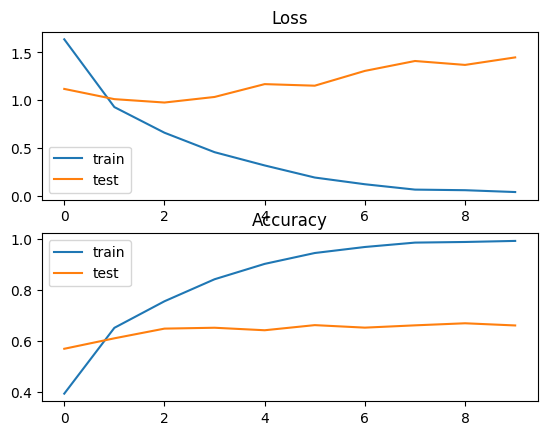

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()